**Data Description:**
The data at hand contains medical costs of people characterized by certain attributes.

**Domain:**
Healthcare

**Context:**
Leveraging customer information is paramount for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have.

**Attribute Information:**
* age: age of primary beneficiary
* sex: insurance contractor gender, female, male
* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
* children: Number of children covered by health insurance / Number of dependents
* smoker: Smoking
* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* charges: Individual medical costs billed by health insurance.

In [15]:
#Import necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import ttest_ind
import scipy.stats as stats  

In [3]:
#Read the data as a data frame
insurance = pd.read_csv("insurance.csv")
#Display top 5 records
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Perform basic EDA which should include the following and print out your insights at every step

In [5]:
insurance.shape

(1338, 7)

In [5]:
#Data type of each attribute
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#Checking the presence of missing values
insurance.isna().apply(pd.value_counts)

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


In [7]:
#point summary of numerical attributes
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

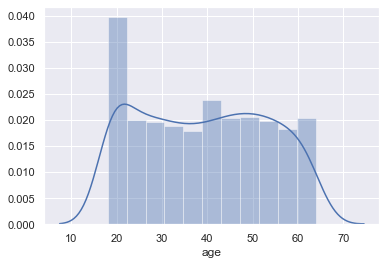

In [8]:
# Distribution of age 
sns.set()    #setting seaborn style to default
sns.distplot(insurance['age'])
plt.show()

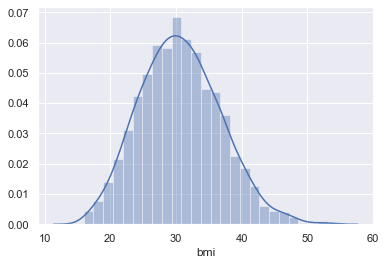

In [9]:
# Distribution of bmi
sns.distplot(insurance['bmi'])
plt.show()

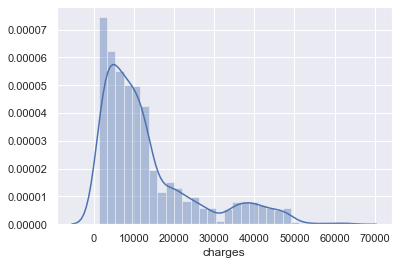

In [10]:
# Distribution of charges
sns.distplot(insurance['charges'])
plt.show()

## Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [11]:
#Measure of skewness of all numerical columns
insurance.skew(axis = 0, skipna = True)

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

In [12]:
#Measure of skewness of 'bmi' column
bmi = insurance['bmi']
bmi.skew()

0.2840471105987448

In [13]:
#Measure of skewness of 'age' column
age = insurance['age']
age.skew()

0.05567251565299186

In [14]:
#Measure of skewness of 'charges' column
charges = insurance['charges']
charges.skew()

1.5158796580240388

## Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

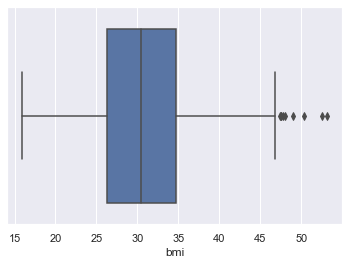

In [15]:
#Checking the presence of outliers in ‘bmi’ column
sns.boxplot(insurance['bmi'])

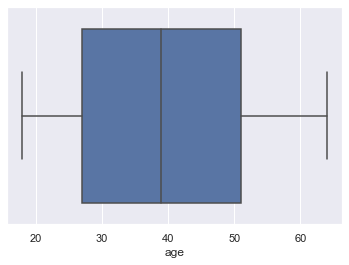

In [16]:
#Checking the presence of outliers in ‘age’ column
sns.boxplot(insurance['age'])

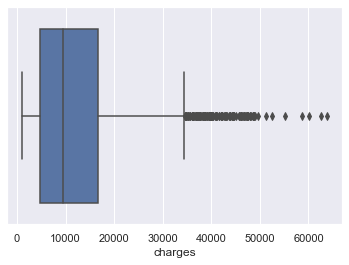

In [17]:
#Checking the presence of outliers in ‘charges’ column
sns.boxplot(insurance['charges'])

## Distribution of categorical columns (include children)

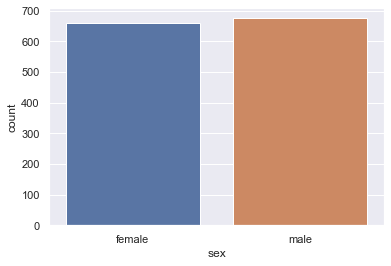

In [18]:
#Distribution of 'sex' column
sns.countplot(insurance['sex'])

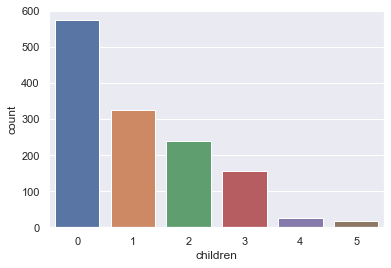

In [19]:
#Distribution of 'children' column
sns.countplot(insurance['children'])

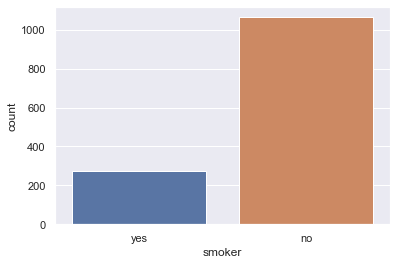

In [20]:
#Distribution of 'smoker' column
sns.countplot(insurance['smoker'])

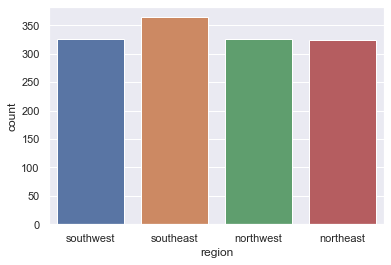

In [21]:
#Distribution of 'region' column
sns.countplot(insurance['region'])

In [27]:
#Pair plot that includes all the columns of the data frame
#First convert children from object type to float type
insurance['smoker'] = insurance['smoker'].astype('string')  # converting the children column from object / string type to float

In [28]:
#First convert sex from object type to float type
insurance['sex'] = insurance['sex'].astype('string')  # converting the sex column from object / string type to float

In [29]:
#First convert  from object type to float type
insurance['region'] = insurance['region'].astype('string')  # converting the sex column from object / string type to float

In [31]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   string 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   string 
 5   region    1338 non-null   string 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), string(3)
memory usage: 73.3 KB


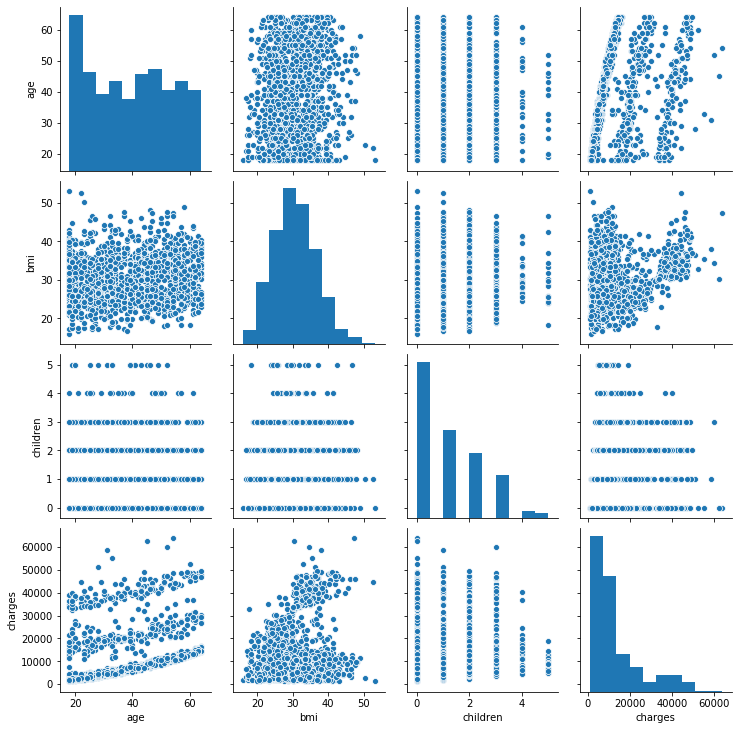

In [6]:
insurance_attr = insurance.iloc[:, 0:7]
sns.pairplot(insurance_attr)

## Q. Do charges of people who smoke differ significantly from the people who don't?
* $H_0$: Charges of people who smoke differ significantly from people who don't smoke
* $H_A$: Charges of people who smoke do not differ significantly from people who don't smoke

* Solution with random sample size < 30(as sample data is not provided)

In [101]:
#Assuming a sample size of 28
insurance_random = insurance.sample(n=28)

In [102]:
#Filtering out data - people who are smokers
insurance_smokers = insurance_random[insurance_random['smoker'] == 'yes']

In [103]:
#Filtering out data - people who do not smoke
insurance_nonSmokers = insurance_random[insurance_random['smoker'] == 'no']

In [104]:
#Carrying out a ttest
#Here we select 𝛼 = 0.05 and sample size < 30 and population standard deviation is not known
t_statistic = stats.ttest_ind(insurance_nonSmokers.charges,insurance_smokers.charges)
t_statistic

Ttest_indResult(statistic=-3.9013639928080437, pvalue=0.0006043400731244138)

# Rejecting the null hypothesis as at condidence level 95% the value is not between -1.984 and + 1.984

* Solution considering the sample size = given that in insurance CSV 

In [105]:
insuranceS = insurance[insurance['smoker'] == 'yes']ffffffffffffffff

In [106]:
insuranceNS = insurance[insurance['smoker'] == 'no']

In [109]:
t_statistic = stats.ttest_ind(insuranceS.charges,insuranceNS.charges)
t_statistic

Ttest_indResult(statistic=46.664921172723716, pvalue=8.271435842177219e-283)

## Q. Does bmi of males differ significantly from that of females
* $H_0$: bmi of males differ significantly from that of females
* $H_A$: bmi of males does not differ significantly from that of females

* Solution considering the sample size = given that in insurance CSV

In [114]:
males = insurance[insurance['sex'] == 'male']
female = insurance[insurance['sex'] == 'female']

In [115]:
t_statistic = stats.ttest_ind(males.bmi,female.bmi)
t_statistic

Ttest_indResult(statistic=1.696752635752224, pvalue=0.08997637178984932)

## Accepting the null hypothesis as at $\alpha$ = 0.05 the value is between -1.984 and + 1.984

In [128]:
male_smokers = males[males['smoker'] == 'yes']
male_smokers.smoker.count()

159

In [129]:
female_smokers = female[female['smoker'] == 'yes']
female_smokers.smoker.count()

115

In [130]:
female_nonsmokers = female[female['smoker'] == 'no']
female_nonsmokers.smoker.count()

547

In [131]:
male_nonsmokers = males[males['smoker'] == 'no']
male_nonsmokers.smoker.count()

517

* Null hypothesis (H0) -> proportion of smokers is significantly different in different genders
* An alternate hypothesis(HA) -> proportion of smokers is not significantly different in different genders

In [133]:
from scipy.stats import chi2_contingency 
data = [[159, 517], [115, 547]] 
stat, p, dof, expected = chi2_contingency(data) 

# interpret p-value 
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 

p value is 0.006548143503580674
Dependent (reject H0)


In [143]:
mylabels = ['male','female']
mycolumns = ['smokers', 'nonsmokers']
df = pd.DataFrame(data=data,index=mylabels,columns=mycolumns)

In [144]:
df

,smokers,nonsmokers
male,159,517
female,115,547


In [147]:
pd.crosstab(insurance['sex'],insurance['smoker'])

smoker,no,yes
sex,,
female,547,115
male,517,159


In [148]:
#Null Hypothesis--> H0 = "The distribution of bmi across women with no children,one child and two children is not same"
#Alternate hypothesis--> H1 = "The distribution of bmi across women with no children,one child and two children is same"

#make the data frame of females having children less than or equal to 2

df = insurance[(insurance['children']<=2) & (insurance['sex']=='female')]
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
9,60,female,25.84,0,no,northwest,28923.13692
11,62,female,26.29,0,yes,southeast,27808.72510
...,...,...,...,...,...,...,...
1331,23,female,33.40,0,no,southwest,10795.93733
1334,18,female,31.92,0,no,northeast,2205.98080
1335,18,female,36.85,0,no,southeast,1629.83350
1336,21,female,25.80,0,no,southwest,2007.94500


C:\Users\I329971\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


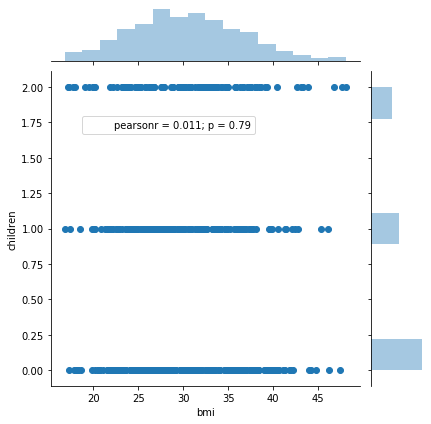

In [149]:
#plot the graph between bmi and children
jp = sns.jointplot(df['bmi'],df['children'])
jp = jp.annotate(stats.pearsonr, fontsize=10, loc=(0.1, 0.8))
plt.show()

* So from above we can see that p_value is 0.79 which means that The distribution of bmi across women with no children,one child and two children is same and we reject H0(Null Hypothesis)